In [58]:
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv('data/sample_submission.csv')
df.head()

,object_id,class_6,class_15,class_16,class_42,class_52,class_53,class_62,class_64,class_65,class_67,class_88,class_90,class_92,class_95,class_99
0,13,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,14,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,17,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,23,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,34,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Metadata

In [23]:
df_metadata = pd.read_csv('data/training_set_metadata.csv')

In [33]:
df_metadata.head()


,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [32]:
df_metadata.shape


(7848, 12)

In [37]:
num_clases = df_metadata['target'].unique()
len(num_clases)

14

## Conjunto de entranamiento

In [ ]:
df_train = pd.read_csv('data/training_set.csv')

In [26]:
df_train.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [14]:
df_train.shape

(1421705, 6)

### Object 615

In [52]:
obj_615 = df_train[df_train['object_id'] == 615]
obj_615.shape

(352, 6)

In [85]:
obj_615['passband'].unique()


array([2, 1, 3, 4, 5, 0])

In [78]:
pass_1 = obj_615[obj_615['passband'] == 1]
pass_1.shape

(58, 6)

In [ ]:
obj_615['mjd'].min

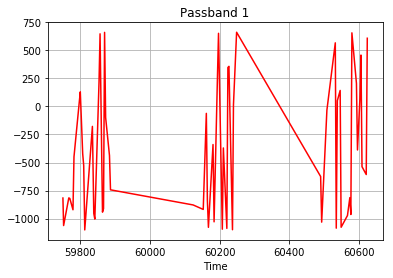

In [119]:
pass_1 = obj_615[obj_615['passband'] == 1]
x = pass_1['mjd']
y = pass_1['flux']

plt.xlabel('Time')
plt.plot(x,y, 'r')
plt.title('Passband '+ str(1))
plt.grid(True)

In [75]:
time_min = (59750.4229-40587)*86400
print(time_min, "Monday, 20 June 2022 10:08:58.559")

time_max = (60624.2132 - 40587)*86400
print(time_max, " Sunday, 10 November 2024 5:07:00.479")

time_med = (59750.4306 - 40587)*86400
print(time_med, "Monday, 20 June 2022 10:20:03.840")

1655719738.5599997 Monday, 20 June 2022 10:08:58.559
1731215220.4799998  Sunday, 10 November 2024 5:07:00.479
1655720403.84 Monday, 20 June 2022 10:20:03.840


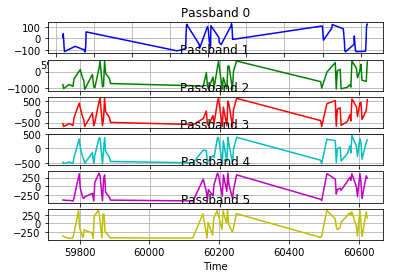

In [116]:
passband = [0,1,2,3,4,5]
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for band in passband:
    pass_1 = obj_615[obj_615['passband'] == band]
    x = pass_1['mjd']
    y = pass_1['flux']
    plt.subplot(6,1,band+1)
    plt.xlabel('Time')
    plt.plot(x,y, color[band])
    plt.title('Passband '+ str(band))
    plt.grid(True)
#plt.subplots_adjust(hspace=1.0, wspace=2, bottom=0.17, left=0.075, top=0.18)
    


In [ ]:
passband = [0,1,2,3,4,5]

for band in passband:
    pass_1 = obj_615[obj_615['passband'] == band]
    x = pass_1['mjd']
    y = pass_1['flux']
    plt.subplot(6,1,band+1)
    plt.xlabel('Time')
    plt.plot(x,y)
    plt.title('Passband '+ str(band))
    plt.grid(True)
#plt.subplots_adjust(hspace=1.0, wspace=2, bottom=0.17, left=0.075, top=0.18)


### Object 713

In [111]:
pass_2 = obj_615[obj_615['passband'] == 2]

obj_713 = df_train[df_train['object_id'] == 713]
obj_713.shape


(350, 6)

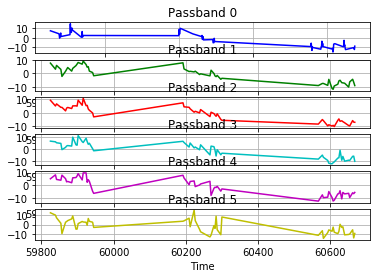

In [115]:
passband = [0,1,2,3,4,5]
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for band in passband:
    pass_1 = obj_713[obj_713['passband'] == band]
    x = pass_1['mjd']
    y = pass_1['flux']
    plt.subplot(6,1,band+1)
    plt.xlabel('Time')
    plt.plot(x,y,color[band])
    plt.title('Passband '+ str(band))
    plt.grid(True)

##  Test dataset

In [21]:
df_test_sample = pd.read_csv('data/test_set_sample.csv')
df_test_sample.shape

(1000000, 6)

In [62]:
df_test_sample.head()

,object_id,mjd,passband,flux,flux_err,detected
0,13,59798.3205,2,-1.299735,1.357315,0
1,13,59798.3281,1,-2.095392,1.148654,0
2,13,59798.3357,3,-0.923794,1.763655,0
3,13,59798.3466,4,-4.009815,2.602911,0
4,13,59798.3576,5,-3.403503,5.367328,0
